# Group 6 -- Households electrical devices

### Importing Dependencies

In [220]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import GlobalAveragePooling2D,DepthwiseConv2D,BatchNormalization,Conv2D, MaxPooling2D, Dropout, Flatten, Dense # type: ignore
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau # type: ignore

import numpy as np
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd

### Data preparation

In [221]:
# 1.) Load training and testing images in "coarse" label. "coarse" label means "types of object" (e.g., fruits, vegetable, etc.)
(a, coarse_TrLabels), (b,coarse_TsLabels) = keras.datasets.cifar100.load_data(label_mode='coarse') # Tr: Training; Ts: Testing
print('Coarse Class: {}'.format(np.unique(coarse_TrLabels)))

# 2.) Load training and testing image in "fine" label. "fine" labels refers to "name of object" (e.g., apple, carrots, etc.)
(fine_train, fine_Trlabels), (fine_test, fine_TsLabels) = keras.datasets.cifar100.load_data(label_mode='fine')
print('Fine Class for all: {}'.format(np.unique(fine_Trlabels)))

# 3.) Extract all images of a specific coarse class from the TRAINING DATASET
#     The "5" below is the assigned coarse class to "Households electrical devices" images.
idx = []  # index holder
for i in range(len(coarse_TrLabels)):
  if coarse_TrLabels[i] == 5: # checks the coarse label of each sample in the training dataset
	  idx.append(i)  # append the index of an input image with "Households electrical devices" coarse label.

print('Total images with 5 coarse label (Households electrical devices) from TRAINING DATASET: {}'.format(len(idx)))
idx = np.array(idx)


Coarse Class: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Fine Class for all: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
Total images with 5 coarse label (Households electrical devices) from TRAINING DATASET: 2500


In [222]:

# 4.) Extract all image and corresponding "fine" label and store in train_images, train_labels variable list.
train_images, train_labels = fine_train[idx], fine_Trlabels[idx]
print("Shape of the image training dataset: {}".format(train_images.shape))
uniq_fineClass = np.unique(train_labels)
print('Fine Class for the extracted training images: {}'.format(uniq_fineClass))

# 5.) Extract all images of a specific coarse class from the TESTING DATASET
#     The "5" below is the assigned coarse class to "Households electrical devices" images.
idx = []
for i in range(len(coarse_TsLabels)):
	if coarse_TsLabels[i] == 5:
		idx.append(i)

print('Total images with 5 coarse label (Households electrical devices) from TESTING DATASET: {}'.format(len(idx)))
idx = np.array(idx)

Shape of the image training dataset: (2500, 32, 32, 3)
Fine Class for the extracted training images: [22 39 40 86 87]
Total images with 5 coarse label (Households electrical devices) from TESTING DATASET: 500


In [223]:
# 6.) Extract all image and corresponding "fine" label and store in test_images, test_labels variable list.
test_images, test_labels = fine_test[idx], fine_TsLabels[idx]
print("Shape of the image testing dataset: {}".format(test_images.shape))
uniq_fineClass = np.unique(test_labels)
print('Fine Class for the extracted testing images: {}'.format(uniq_fineClass))

Shape of the image testing dataset: (500, 32, 32, 3)
Fine Class for the extracted testing images: [22 39 40 86 87]


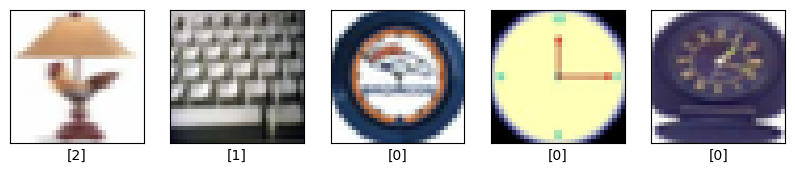

In [224]:
# 7.) Relabel training and testing dataset to start from zero (0).
for i in range(len(uniq_fineClass)):
  for j in range(len(train_labels)):
    if train_labels[j] == uniq_fineClass[i]:
      train_labels[j] = i

  for j in range(len(test_labels)):
    if test_labels[j] == uniq_fineClass[i]:
      test_labels[j] = i

# Plot few samples from images from the TESTING DATASET
plt.figure(figsize=(10,2))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel(test_labels[i])

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_107 (Conv2D)             │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_99 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_108 (Conv2D)             │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_100               │ (None, 6, 6, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_109 (Conv2D)             │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_101               │ (None, 2, 2, 128)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_31 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 270,372 (1.03 MB)

 Trainable params: 270,372 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 11.3601 - sparse_categorical_accuracy: 0.1617 - val_loss: 2.3886 - val_sparse_categorical_accuracy: 0.2920 - learning_rate: 0.0010
Epoch 2/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.6759 - sparse_categorical_accuracy: 0.2493 - val_loss: 2.1711 - val_sparse_categorical_accuracy: 0.3000 - learning_rate: 0.0010
Epoch 3/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.5810 - sparse_categorical_accuracy: 0.2948 - val_loss: 2.0210 - val_sparse_categorical_accuracy: 0.3760 - learning_rate: 0.0010
Epoch 4/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.5450 - sparse_categorical_accuracy: 0.3197 - val_loss: 1.7438 - val_sparse_categorical_accuracy: 0.3680 - learning_rate: 0.0010
Epoch 5/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.4935 - sparse_categorical_accuracy: 0.3621 - val_loss: 1.7077 - val_sparse_categorical_accuracy: 0.3960 - learning_rate: 0.0010
Epoch 6/40
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - l

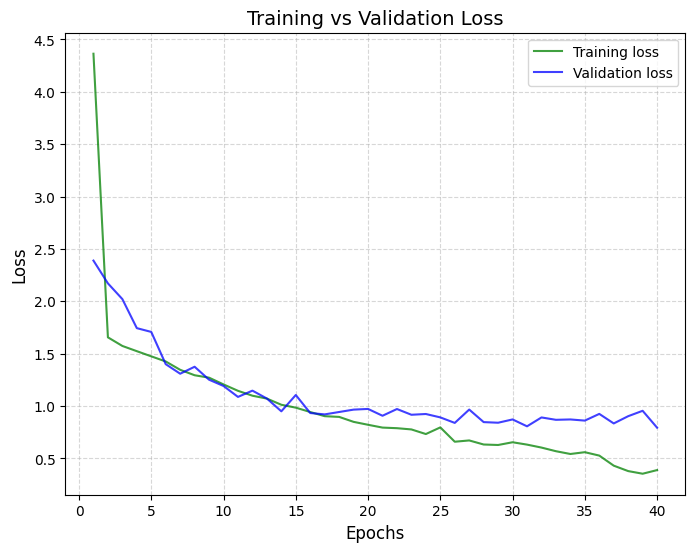

In [225]:
# model = tf.keras.Sequential([
#     # Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
#     # MaxPooling2D(pool_size=(2, 2)),
    
#     # Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     # MaxPooling2D(pool_size=(2, 2)),
    
#     # Conv2D(128, kernel_size=(3, 3), activation='relu'),
#     # MaxPooling2D(pool_size=(2, 2)),

#     # Flatten(),
#     # Dense(256, activation='relu'),
#     # Dropout(0.6),  # Helps prevent overfitting
#     # Dense(len(uniq_fineClass), activation='softmax')
#     Conv2D(32, 3, 1, activation='relu', input_shape = (32,32,3)),
#     Conv2D(64, 3, 1, activation='relu'),
#     Conv2D(128, 3, 1, activation='relu'),
#     Flatten(),
#     Dense(256, activation='relu'),
#     Dropout(0.6),  # Helps prevent overfitting
#     Dense(len(uniq_fineClass), activation='softmax')
# ])

model = keras.Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
])


model.summary()

# model.compile(optimizer='adam', 
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy']
)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

metricInfo = model.fit(train_images, train_labels, epochs=40, validation_split=0.1, callbacks=[lr_scheduler, early_stopping])
# metricInfo = model.fit(train_images, train_labels, epochs=30, validation_split=0.1, batch_size=64)

loss = metricInfo.history['loss']
val_loss = metricInfo.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, 'g-', label="Training loss", alpha=0.75)
plt.plot(epochs, val_loss, 'b-', label='Validation loss', alpha=0.75)
plt.title('Training vs Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

In [226]:
# Test the model
str_class = ['clock', 'computer keyboard', 'lamp', 'telephone', 'television']

print(test_images.shape)
print("Class in the testing image: {}".format(np.unique(test_labels)))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Total number of testing image: {}'.format(len(test_images)))
print('Test accuracy:', test_acc)

# Another way to test using "prediction" method
classification = model.predict(test_images)
print('\nDisplaying prediction of the first test input image: {}'.format(classification[0]))

# get the index of the maximum probability in the classification[0] result
max_prob_idx = np.argmax(classification[0])
print('Predicted class: {}--{}'.format(max_prob_idx, str_class[max_prob_idx]))
idx = test_labels[0]
print('True class: {} -- {}'.format(idx[0], str_class[idx[0]]))

(500, 32, 32, 3)
Class in the testing image: [0 1 2 3 4]
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9175 - sparse_categorical_accuracy: 0.7057
Total number of testing image: 500
Test accuracy: 0.7120000123977661
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Displaying prediction of the first test input image: [8.0298400e-04 3.5722042e-05 9.9768013e-01 1.3733070e-03 1.0788110e-04
 1.4645105e-13 6.1698450e-12 6.0746716e-14 2.2298730e-09 2.2397147e-21
 1.8979558e-09 5.5362326e-18 1.3032395e-19 9.3659603e-12 1.3204327e-13
 1.8724336e-13 1.0792594e-12 1.5376855e-25 7.7954990e-17 2.0130549e-17
 2.2926214e-18 4.9459991e-17 1.4934982e-20 1.7455215e-15 6.2050256e-16
 2.8382006e-14 7.3970257e-12 6.3565516e-19 1.3004374e-21 3.7199880e-17
 2.3593808e-15 1.7292058e-10 1.9250777e-20 1.8692210e-18 4.0048919e-23
 3.7047621e-18 2.1437031e-17 9.1027208e-22 2.0101481e-15 2.0915856e-17
 3.4993733e-10 2.3545013e-20 4.2618009e-24 4.1718702e-15 3.0642077e-24
 1.3723455e-15 6.5848083e-17 1.1481103e-19 6.17225

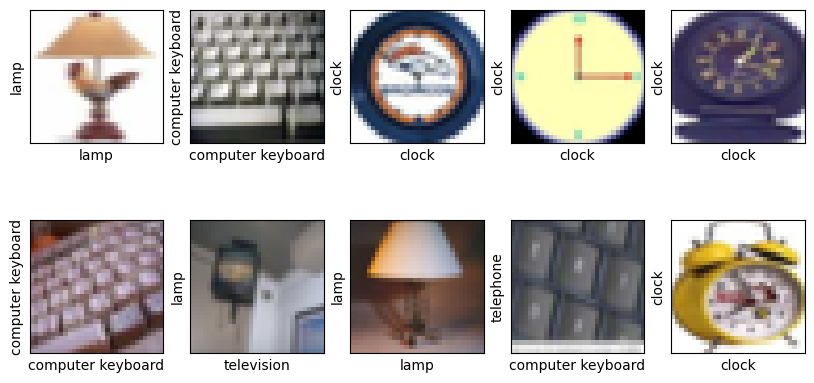

In [227]:
#for i in range(10):
    #print(f'\n{i}.) Displaying prediction of the first test input image: {classification[i]}')
    # get the index of the maximum probability in the classification[0] result
    #max_prob_idx = np.argmax(classification[i])
   # print(f'Predicted class: {max_prob_idx}--{str_class[max_prob_idx]}')
   # idx = test_labels[i]
    #print(f'True class: {idx[0]} -- {str_class[idx[0]]}')
    # Plot few samples from images from the TESTING DATASET
#plt.figure(figsize=(10,2))
#plt.subplot(1,10,i+1)
#plt.xticks([])
#plt.yticks([])
# plt.grid(False)
# plt.imshow(test_images[i], cmap=plt.cm.binary)
# plt.xlabel(str_class[idx[0]])
# plt.ylabel(str_class[max_prob_idx])

plt.figure(figsize=(10,5))
for i in range(10):
  max_prob_idx = np.argmax(classification[i])
  idx = test_labels[i]
  plt.subplot(2,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  #plt.imshow(test_images[i], cmap=plt.cm.binary)
  #plt.xlabel(test_labels[i])
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  plt.xlabel(str_class[idx[0]])
  plt.ylabel(str_class[max_prob_idx])
